### Background substraction in an Image using Concept of Running Average

Background subtraction is a technique for separating out foreground elements from the background and is done by generating a foreground mask. This technique is used for detecting dynamically moving objects from static cameras. Background subtraction technique is important for object tracking. 

There are several techniques for background subtraction In this article, we discuss the concept of Running Average. The running average of a function is used to separate foreground from background. In this concept, the video sequence is analyzed over a particular set of frames. During this sequence of frames, the running average over the current frame and the previous frames is computed. This gives us the background model and any new object introduced in the during the sequencing of the video becomes the part of the foreground. Then, the current frame holds the newly introduced object with the background. Then the computation of the absolute difference between the background model (which is a function of time) and the current frame (which is newly introduced object) is done. 

Running average is computed using the equation given below :

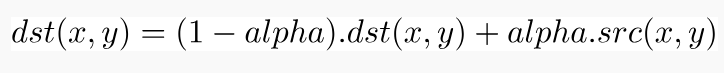

#### How Running Average method works?

The objective of the program is to detect active objects from the difference obtained from the reference frame and the current frame. We keep feeding each frame to the given function, and the function keeps finding the averages of all frames. Then we compute the absolute difference between the frames. The function used is cv2.accumulateWeighted().

 - cv2.accumulateWeighted(src, dst, alpha)

The parameters passed in this function are :

 1. src: The source image. The image can be colored or grayscaled image and either 8-bit or 32-bit floating point.
 2. dst: The accumulator or the destination image. It is either 32-bit or 64-bit floating point. NOTE: It should have the same channels as that of the source image. Also, the value of dst should be predeclared initially.
 3. alpha: Weight of the input image. Alpha decides the speed of updating. If you set a lower value for this variable, running average will be performed over a larger amount of previous frames and vice-versa.

In [1]:
import cv2 
import numpy as np

In [2]:
# capture frames from a camera 
cap = cv2.VideoCapture(0) 
  
# read the frames from the camera 
_, img = cap.read() 
  
# modify the data type 
# setting to 32-bit floating point 
averageValue1 = np.float32(img) 
  
# loop runs if capturing has been initialized.  
while(1): 
    # reads frames from a camera  
    _, img = cap.read() 
      
    # using the cv2.accumulateWeighted() function 
    # that updates the running average 
    cv2.accumulateWeighted(img, averageValue1, 0.02) 
      
    # converting the matrix elements to absolute values  
    # and converting the result to 8-bit.  
    resultingFrames1 = cv2.convertScaleAbs(averageValue1) 
  
    # Show two output windows 
    # the input / original frames window 
    cv2.imshow('InputWindow', img) 
  
    # the window showing output of alpha value 0.02 
    cv2.imshow('averageValue1', resultingFrames1) 
      
    # Wait for Esc key to stop the program  
    k = cv2.waitKey(30) & 0xff
    if k == 27:  
        break
  
# Close the window  
cap.release()  
    
# De-allocate any associated memory usage  
cv2.destroyAllWindows()